## Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

Null hypothesis: There is no change in latency between previous service provider and new service provider.

Alternative hypothesis: There is a change in latency between the service providers.

    -True positive: Network latency has changed due to change in service providers
    -True negative: Network latency has neither increased or decreased.
    -Type I error: A latency change was shown, but the latency actually hadn't changed.
    -Type II error: There was a change in latency, but we failed to identify it.

- Is the website redesign any good?

Null hypothesis: Daily visitors to the website remain the same.

Alternative hypothesis: Daily visitors to the website have changed.

    -True positive: There is an increase in daily website visitors
    -True negative: Website visitors stay approximately the same.
    -Type I error: There was an increase in daily visitors, but it was caused by an external event.
    -Type II error: We noticed no change in visitors, but we were measuring the wrong metric.

- Is our television ad driving more sales?

Null hypothesis: Sales have stayed the same since the television ad has aired.

Alternative hypothesis: Sales have changed since the airing of the ad.

    -True positive: The ad caused sales to either increase or decrease.
    -True negative: The ad had no effect on sales.
    -Type I error: We viewed a change in sales, but in reality the ad had no effect.
    -Type II error: The ad had an effect, but we couldn't observe any direct change.

----

## Comparison of Groups

In [14]:
# standard data imports
import pandas as pd
import numpy as np
import env
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#pulling sample dataset
from pydataset import data

#new library for stats
from scipy import stats

1. Use the following contingency table to help answer the question of whether using a Macbook and being a Codeup student are independent of each other.
    
    
|  | Codeup Student | Not Codeup Student |
| --- | --- | --- |
| Uses a Macbook | 49 | 20 |
| Doesn't Use A Macbook | 1 | 30 |

$H_0$: Using a Macbook and being a Codeup student are unrelated to each other (independent)

$H_a$: Using a Macbook and being a Codeup student *are* related to each other (dependent)

In [17]:
# Create the table
observed = pd.DataFrame(
{
    'CodeupStudent':[49,1],
    'NotCodeupStudent':[20,30]
},index=['Uses a Macbook',"Doesn't Use A Macbook"]
)
observed

,CodeupStudent,NotCodeupStudent
Uses a Macbook,49,20
Doesn't Use A Macbook,1,30


In [18]:
# Set our alpha
alpha = 0.05

In [19]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [20]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000


In [21]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


2. Choose another 2 categorical variables from the `mpg` dataset.

In [23]:
# Import the dataset
mpg = data('mpg')
mpg.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
dtype: object

In [24]:
mpg.sample(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
16,audi,a6 quattro,2.8,1999,6,auto(l5),4,15,24,p,midsize
187,toyota,camry solara,2.2,1999,4,auto(l4),f,21,27,r,compact
131,land rover,range rover,4.0,1999,8,auto(l4),4,11,15,p,suv
151,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv
155,pontiac,grand prix,3.1,1999,6,auto(l4),f,18,26,r,midsize
167,subaru,impreza awd,2.2,1999,4,manual(m5),4,19,26,r,subcompact
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
156,pontiac,grand prix,3.8,1999,6,auto(l4),f,16,26,p,midsize
109,hyundai,sonata,2.4,1999,4,auto(l4),f,18,26,r,midsize
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv


In [25]:
# Cycling through variables to explore value counts
# mpg['class'].describe()

- State your null and alternative hypotheses.

$H_0$: The number of cylinders in a vehicle are unrelated to the class of vehicle.

$H_a$: The number of cylinders in a vehicle *are* related to the class of vehicle.

- State your alpha.

In [28]:
alpha = 0.05

- Perform a $chi2$ test of independence.    

In [30]:
observed = pd.crosstab(mpg.cyl,mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [31]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

- State your conclusion

In [33]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


We conclude that there *is* a relationship between the class of the car and the cylinders.

3. Use the data from the employees database to answer these questions:

In [36]:
# Pull the tables from the database
url = env.get_db_url('employees')

query = '''
SELECT * FROM employees
JOIN dept_emp
    USING(emp_no)
JOIN departments
    USING(dept_no)
'''

employees = pd.read_sql(query,url)

In [37]:
employees.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,10011,1953-11-07,Mary,Sluis,F,1990-01-22,1990-01-22,1996-11-09,Customer Service
1,d009,10038,1960-07-20,Huan,Lortz,M,1989-09-20,1989-09-20,9999-01-01,Customer Service
2,d009,10049,1961-04-24,Basil,Tramer,F,1992-05-04,1992-05-04,9999-01-01,Customer Service
3,d009,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02,1992-11-11,9999-01-01,Customer Service
4,d009,10088,1954-02-25,Jungsoon,Syrzycki,F,1988-09-02,1992-03-21,9999-01-01,Customer Service


- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

$H_0$: An employee's gender is independent of whether they work in sales or marketing

$H_a$: An employee's gender is *not* independent of whether they work in sales or marketing

In [39]:
# Saving as new dataframe since I might need the old one still
dept_bool = (employees.dept_name == 'Sales') | (employees.dept_name == 'Marketing')
current_bool = employees.to_date.astype(str) == '9999-01-01'
curr_emp = employees[current_bool & dept_bool]
curr_emp.sample(5)

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
151529,d001,206925,1958-01-10,Patricio,Masaki,F,1986-03-26,1991-04-05,9999-01-01,Marketing
318226,d007,423204,1965-01-08,Uma,Stranks,M,1987-11-19,1991-09-13,9999-01-01,Sales
152400,d001,219637,1956-12-30,Hitofumi,Gluchowski,M,1991-08-04,1998-02-02,9999-01-01,Marketing
295942,d007,105489,1953-01-16,Jasminko,Sadowski,M,1986-10-28,1986-10-28,9999-01-01,Sales
318944,d007,427339,1957-03-30,JoAnna,Rodiger,M,1995-09-29,1999-04-07,9999-01-01,Sales


In [40]:
# Save the crosstab into observed variable
observed = pd.crosstab(curr_emp.gender,curr_emp.dept_name).T
observed

gender,F,M
dept_name,,
Marketing,5864,8978
Sales,14999,22702


In [41]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [42]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


We conclude that there is no relationship between gender and whether the employee has worked in Sales or Marketing.

- Is an employee's gender independent of whether or not they are or have been a manager?

$H_0$: An employee's gender is independent of whether they are or have been a manager.

$H_a$: An employee's gender is *not* independent of whether they are or have been a manager.

In [45]:
# Read new query

query = '''
SELECT *
FROM dept_manager
'''

manager = pd.read_sql(query,url)
manager.sample(10)

,emp_no,dept_no,from_date,to_date
16,111035,d007,1985-01-01,1991-03-07
15,110854,d006,1994-06-28,9999-01-01
3,110114,d002,1989-12-17,9999-01-01
12,110725,d006,1985-01-01,1989-05-06
23,111939,d009,1996-01-03,9999-01-01
10,110511,d005,1985-01-01,1992-04-25
22,111877,d009,1992-09-08,1996-01-03
5,110228,d003,1992-03-21,9999-01-01
6,110303,d004,1985-01-01,1988-09-09
20,111692,d009,1985-01-01,1988-10-17


In [46]:
# Join employees with manager
emp_manager = employees.merge(manager,how='left',on='emp_no')
emp_manager.sample(10)

,dept_no_x,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date_x,to_date_x,dept_name,dept_no_y,from_date_y,to_date_y
172072,d004,40251,1961-03-02,Berni,Malinowski,F,1988-07-10,1994-07-07,2000-08-25,Production,NaN,NaN,NaN
232618,d004,477742,1952-08-16,Odoardo,Garigliano,F,1992-01-16,1992-01-16,9999-01-01,Production,NaN,NaN,NaN
146022,d001,34354,1952-04-02,Kristen,Acton,F,1985-03-08,1985-03-08,9999-01-01,Marketing,NaN,NaN,NaN
135279,d003,244218,1957-02-18,Phillip,Kushner,M,1990-01-20,1997-11-22,9999-01-01,Human Resources,NaN,NaN,NaN
160672,d001,443316,1957-06-23,Ranga,Kisuki,M,1989-11-30,1997-03-13,9999-01-01,Marketing,NaN,NaN,NaN
238126,d006,10159,1955-03-03,Serif,Buescher,M,1991-05-29,1996-06-12,9999-01-01,Quality Management,NaN,NaN,NaN
179167,d004,68953,1954-06-18,Yoshimitsu,Serna,M,1998-09-29,1998-09-29,9999-01-01,Production,NaN,NaN,NaN
104973,d005,484964,1962-10-04,Guiseppe,Frijda,F,1997-11-16,1999-11-28,9999-01-01,Development,NaN,NaN,NaN
180935,d004,76245,1954-04-03,Luigi,Lipner,M,1993-11-26,1995-03-14,9999-01-01,Production,NaN,NaN,NaN
110985,d002,39243,1955-09-20,Arco,Heiserman,M,1987-01-02,1999-06-17,2000-11-11,Finance,NaN,NaN,NaN


In [47]:
# Do some cleanup
emp_manager = emp_manager.rename(columns={
    'from_date_x':'dept_from_date',
    'from_date_y':'mgr_from_date',
    'to_date_x':'dept_to_date',
    'to_date_y':'mgr_to_date',
})

emp_manager = emp_manager.drop(columns=['dept_no_y','is_mgr'],errors='ignore')
emp_manager.sample(10)

,dept_no_x,emp_no,birth_date,first_name,last_name,gender,hire_date,dept_from_date,dept_to_date,dept_name,mgr_from_date,mgr_to_date
72499,d005,270864,1960-12-02,Utz,Muchinsky,M,1997-10-19,1997-10-19,9999-01-01,Development,NaN,NaN
130511,d003,74478,1963-02-03,Leen,Alencar,M,1991-08-25,1997-12-03,9999-01-01,Human Resources,NaN,NaN
76575,d005,285296,1953-01-06,Nathalie,Heiserman,M,1991-12-02,1997-12-03,9999-01-01,Development,NaN,NaN
126581,d002,498882,1957-11-19,Vitaly,Vingron,F,1990-11-09,1990-11-09,9999-01-01,Finance,NaN,NaN
189181,d004,109786,1954-11-18,Candida,Gunderson,M,1993-07-07,1997-03-27,9999-01-01,Production,NaN,NaN
313731,d007,297210,1953-06-13,Chanjung,Shackel,M,1995-01-14,1995-01-14,9999-01-01,Sales,NaN,NaN
9458,d009,219877,1954-05-09,Amalendu,Penn,M,1987-11-14,1992-12-18,9999-01-01,Customer Service,NaN,NaN
289704,d007,68988,1957-05-28,Marie,Furudate,M,1991-12-07,1991-12-07,2002-01-06,Sales,NaN,NaN
218647,d004,420695,1955-04-21,Leif,Ferriere,M,1991-12-03,1993-08-09,9999-01-01,Production,NaN,NaN
88929,d005,428334,1959-12-06,Manohar,Cronau,M,1989-06-01,1991-06-07,9999-01-01,Development,NaN,NaN


In [48]:
emp_manager['has_been_mgr'] = np.where(emp_manager.mgr_to_date.isna(),False,True)
emp_manager.has_been_mgr.value_counts()

has_been_mgr
False    331579
True         24
Name: count, dtype: int64

In [49]:
observed = pd.crosstab(emp_manager.gender,emp_manager.has_been_mgr)
observed

has_been_mgr,False,True
gender,,
F,132740,13
M,198839,11


In [50]:
chi2,p,dof,expected = stats.chi2_contingency(observed)

In [51]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


We conclude that there is no relationship between an employee's gender and whether they have or have not been a manager.

-----

## Correlations

1. Answer with the type of stats test you would use (assume normal distribution):

- Is there a relationship between the length of your arm and the length of your foot?

Lengths of arms and feet are continuous variables, so **correlation test**

- Does smoking affect when or not someone has lung cancer?

Smoking is a categorical variable. Having lung cancer is also a categorical variable. Therefore, it is a **proportion test**.

- Is gender independent of a person’s blood type?

Gender is a categorical variable. A person's blood type is also categorical. Therefore, it is a **proportion test**.

- Does whether or not a person has a cat or dog affect whether they live in an apartment?

A person owning a cat/dog is categorical, same as living in an apartment. Therefore, this is a **proportion test**.

- Does the length of time of the lecture correlate with a student's grade?

Length of the lecture is continuous. Assuming the student's grade is measured by a *numerical index* and not an *alphabetical index*, then the student's grade is a continuous variable, and so it is a **correlation test**.

2. Use the `telco_churn` data.

In [67]:
url = env.get_db_url('telco_churn')
pd.read_sql('show tables',url)

,Tables_in_telco_churn
0,contract_types
1,customer_churn
2,customer_contracts
3,customer_details
4,customer_payments
5,customer_signups
6,customer_subscriptions
7,customers
8,internet_service_types
9,payment_types


- Does tenure correlate with monthly charges?

$H_0$: There is *no* correlation between monthly charges and tenure

$H_a$: There *is* a relationship between monthly charges and tenure

In [69]:
customers = pd.read_sql('select * from customers',url)
customers.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


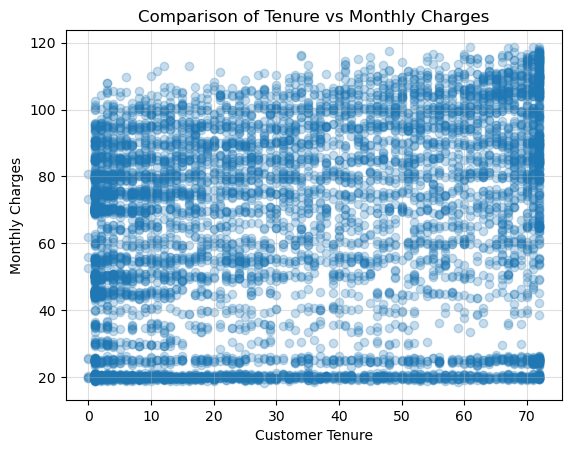

In [70]:
# Let's plot it, see if we notice anything
plt.scatter(customers.tenure,customers.monthly_charges,alpha=0.25)
plt.title('Comparison of Tenure vs Monthly Charges')
plt.xlabel('Customer Tenure')
plt.ylabel('Monthly Charges')

plt.grid(alpha=0.4)

plt.show()

In [71]:
r,p = stats.pearsonr(customers.tenure,customers.monthly_charges)
print(f'r = {r}')
print(f'p = {p}')

r = 0.24789985628615246
p = 4.094044991476844e-99


In [72]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


We reject the null hypothesis, so there may be a relationship between tenure and monthly charges.

- Total charges?

$H_0$: There is no correlation between the tenure and total charges

$H_a$: There is some correlation between tenure and total charges.

In [75]:
# Found errors in plotting, so need to fix them
customers.total_charges = pd.to_numeric(customers.total_charges,errors='coerce')

# Drop nulls, nas, etc.
# customers.total_charges = customers.total_charges.dropna()
customers = customers.dropna()

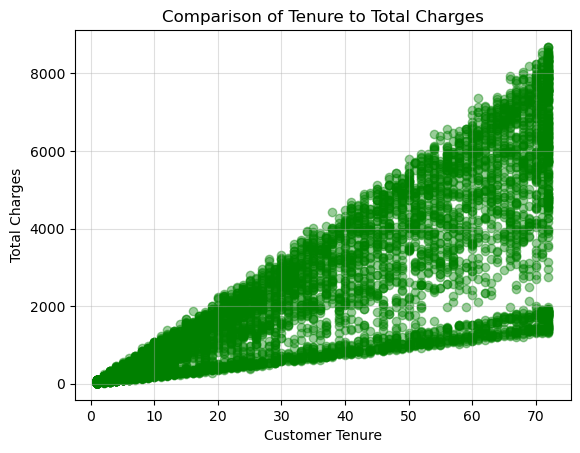

In [76]:
# Plotting tenure against total charges this time
plt.scatter(customers.tenure,customers.total_charges,alpha=0.4,color='green')
plt.title('Comparison of Tenure to Total Charges')
plt.xlabel('Customer Tenure')
plt.ylabel('Total Charges')

plt.grid(alpha=0.4)

plt.show()

In [77]:
# It looks like there is a correlation, so let's confirm
r,p = stats.pearsonr(customers.tenure,customers.total_charges)

In [78]:
if p < alpha:
    print('reject the null hypothesis')
else:
    print('fail to reject the null hypothesis')

reject the null hypothesis


We conclude that there *is* a relationship between the tenure and total charges

- What happens if you control for phone and internet service?

In [81]:
# Create new dataframes to control for phone
yes_phone = customers[customers.phone_service == 'Yes']
no_phone = customers[customers.phone_service == 'No']

In [82]:
# Create new dataframes to control for internet service
customers.internet_service_type_id.value_counts()
internet2 = customers[customers.internet_service_type_id == 2]
internet1 = customers[customers.internet_service_type_id == 1]
internet3 = customers[customers.internet_service_type_id == 3]

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


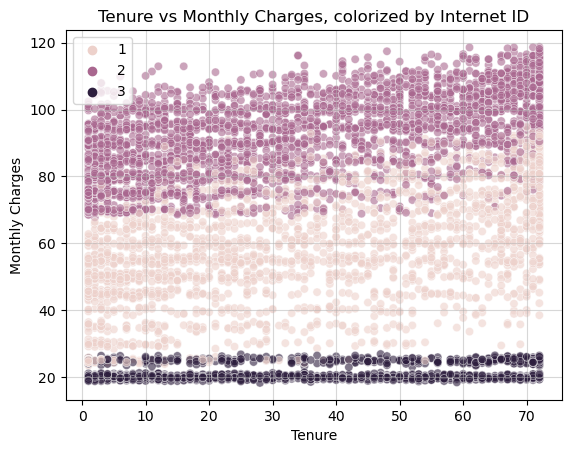

In [83]:
# Make some plots!
sns.scatterplot(customers,x='tenure',y='monthly_charges',alpha=0.6,hue=customers.internet_service_type_id)
plt.title('Tenure vs Monthly Charges, colorized by Internet ID')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')

plt.legend()
plt.grid(alpha=0.5)

plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

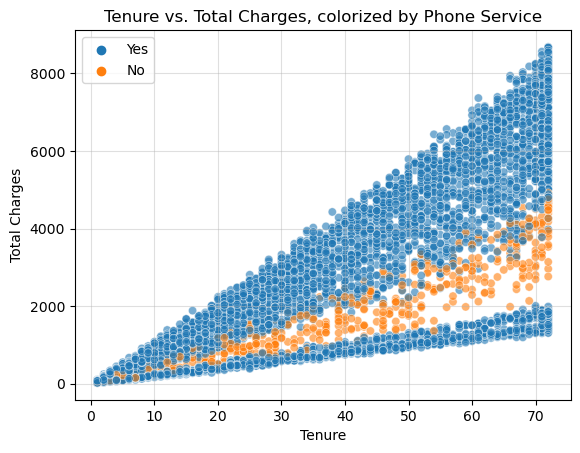

In [84]:
sns.scatterplot(customers,x='tenure',y='total_charges',alpha=0.6,hue=customers.phone_service)
plt.title('Tenure vs. Total Charges, colorized by Phone Service')
plt.xlabel('Tenure')
plt.ylabel('Total Charges')

plt.legend()
plt.grid(alpha=0.4)

plt.show()

In [85]:
# Looking at phone first
r,p = stats.pearsonr(yes_phone.tenure,yes_phone.monthly_charges)
print('Phone = "Yes"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "Yes"; Monthly Charges
r = 0.24419396575193317
p = 6.828016037587985e-87


In [86]:
r,p = stats.pearsonr(no_phone.tenure,no_phone.monthly_charges)
print('Phone = "No"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "No"; Monthly Charges
r = 0.5924298640568981
p = 1.173273903289394e-65


In [87]:
r,p = stats.pearsonr(yes_phone.tenure,yes_phone.total_charges)
print('Phone = "Yes"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "Yes"; Total Charges
r = 0.8298393210699468
p = 0.0


In [88]:
r,p = stats.pearsonr(no_phone.tenure,no_phone.total_charges)
print('Phone = "No"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Phone = "No"; Total Charges
r = 0.9534228506954511
p = 0.0


In [89]:
r,p = stats.pearsonr(internet1.tenure,internet1.monthly_charges)
print('Internet ID = "1"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "1"; Monthly Charges
r = 0.5197012004433117
p = 2.8895185791429484e-167


In [90]:
r,p = stats.pearsonr(internet2.tenure,internet2.monthly_charges)
print('Internet ID = "2"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "2"; Monthly Charges
r = 0.6246206176175593
p = 0.0


In [91]:
r,p = stats.pearsonr(internet3.tenure,internet3.monthly_charges)
print('Internet ID = "3"; Monthly Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "3"; Monthly Charges
r = 0.3461877354857482
p = 4.896604599961622e-44


In [92]:
r,p = stats.pearsonr(internet1.tenure,internet1.total_charges)
print('Internet ID = "1"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "1"; Total Charges
r = 0.9411848215629808
p = 0.0


In [93]:
r,p = stats.pearsonr(internet2.tenure,internet2.total_charges)
print('Internet ID = "2"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "2"; Total Charges
r = 0.9853093528070621
p = 0.0


In [94]:
r,p = stats.pearsonr(internet3.tenure,internet3.total_charges)
print('Internet ID = "3"; Total Charges')
print(f'r = {r}')
print(f'p = {p}')

Internet ID = "3"; Total Charges
r = 0.9814648859044293
p = 0.0


In all instances, $p$ is less than $\alpha$, and therefore in all instances we can reject the null hypothesis and conclude that there is a relationship between tenure and total charges and tenure and monthly charges, regardless of phone or internet service.

3. Use the `employees` database.

In [97]:
# Reset url for employees database and show tables
url = env.get_db_url('employees')
pd.read_sql('show tables',url)

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


- Is there a relationship between how long an employee has been with the company and their salary?

$H_0$: There is no relationship between how long an employee has been with the company and their salary.

$H_a$: There is a relationship between how long an employee has been with the company and their salary.

In [101]:
# Pull relevant data for question
df = pd.read_sql('''
select *
from employees
join salaries
	using(emp_no)
''',url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25


In [103]:
len(df)

2844047

In [105]:
# Isolate employees so that we can get the difference between to_date and hire_date
df = df.sort_values(['emp_no','hire_date','to_date'],ascending=[True,True,False]).drop_duplicates(subset='hire_date',keep='first')

In [107]:
df['is_current'] = df.to_date.astype(str) == '9999-01-01'
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,is_current
16,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,True
22,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,True
29,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,True
45,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,True
58,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,True
...,...,...,...,...,...,...,...,...,...,...
2675924,482240,1959-06-08,Guozhong,Renear,F,1999-12-12,78568,2001-12-11,9999-01-01,True
2699248,484695,1953-07-23,Marit,Katiyar,F,1999-07-08,65804,2001-09-11,9999-01-01,True
2701277,484908,1962-10-22,Willard,Noriega,M,1999-09-15,46735,2001-09-28,9999-01-01,True
2721430,487022,1956-06-26,Zhiguo,Baezner,M,1999-11-26,62409,2002-01-12,9999-01-01,True


In [244]:
# Make new column for tenure days
df['tenure_days'] = np.where(
    df['is_current'],
    pd.Timestamp(dt.datetime.now()).date() - df['hire_date'],
    df['to_date'] - df['hire_date']
)

# Convert tenure_days into a continuous value
df['tenure_days'] =  df['tenure_days'].astype(str).str.strip(' days').astype(int)
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,is_current,tenure_days
16,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,True,13659
22,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,True,13876
29,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,True,13596
45,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,True,13501
58,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,True,12485
...,...,...,...,...,...,...,...,...,...,...,...
2675924,482240,1959-06-08,Guozhong,Renear,F,1999-12-12,78568,2001-12-11,9999-01-01,True,8742
2699248,484695,1953-07-23,Marit,Katiyar,F,1999-07-08,65804,2001-09-11,9999-01-01,True,8899
2701277,484908,1962-10-22,Willard,Noriega,M,1999-09-15,46735,2001-09-28,9999-01-01,True,8830
2721430,487022,1956-06-26,Zhiguo,Baezner,M,1999-11-26,62409,2002-01-12,9999-01-01,True,8758


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

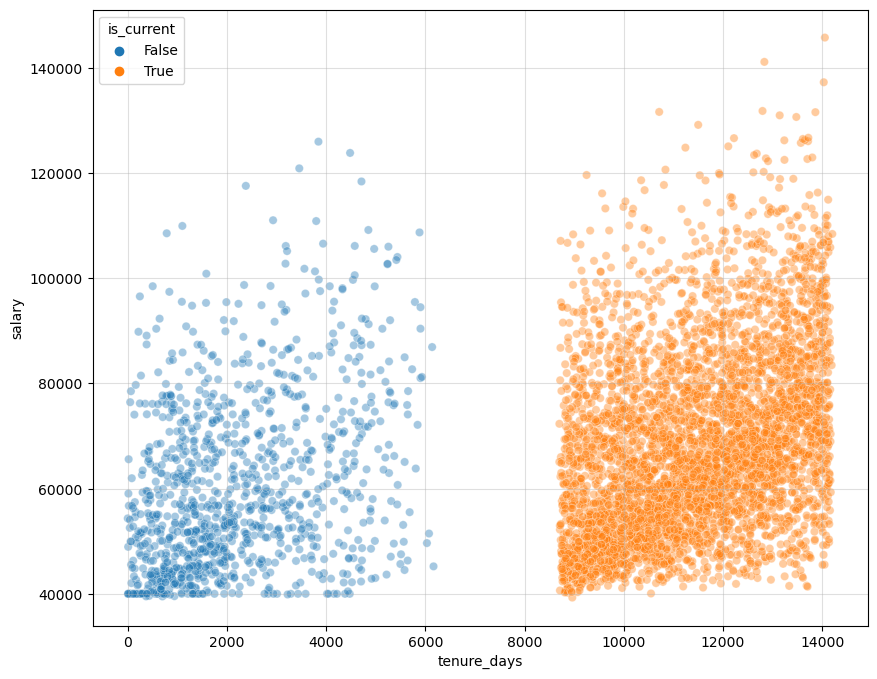

In [262]:
# Plot the days against the salaries
plt.figure(figsize=(10,8))
sns.scatterplot(df,x=df.tenure_days,y=df.salary,hue=df.is_current,alpha=0.4)
plt.title('')
plt.grid(alpha=0.4)

plt.show()

In [268]:
# test overall data
t,p = stats.pearsonr(df.tenure_days,df.salary)

if p < alpha:
    print('reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('There is a linear relationship between salary and tenure days')
else:
    print('fail to reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('There is no linear relationship between salary and tenure days')
    

reject the null hypothesis
t = 0.30856660885221987
p = 3.3401665211521136e-120
There is a linear relationship between salary and tenure days


- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

$H_0$: There is *no* linear relationship between how long an employee has been with the company and how many titles they have held.

$H_a$: There *is* a linear relationship between how long an employee has been with the company and how many titles they have held.

In [293]:
# Create the query (merge employees table with titles table)
query = """
select *
from employees
join titles
	using (emp_no)
"""

In [295]:
# Pull in the data from sql
df = pd.read_sql(query,url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [323]:
# Get a count of titles per employee and tack onto dataset as new column
df['n_titles'] = df.groupby('emp_no')['title'].transform('count')
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,n_titles
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,1
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,1
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,1
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,2
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,2


In [335]:
# Sort values and drop duplicate counts
df = df.sort_values(['emp_no','to_date'],ascending=[True,False]).drop_duplicates(subset='emp_no',keep='first')

In [339]:
# Calculate the tenure of each employee

# Define current employees
df['is_current'] = df.to_date.astype(str) == '9999-01-01'

# Make new column for tenure days
df['tenure_days'] = np.where(
    df['is_current'],
    pd.Timestamp(dt.datetime.now()).date() - df['hire_date'],
    df['to_date'] - df['hire_date']
)

# Convert tenure_days into a continuous value
df['tenure_days'] =  df['tenure_days'].astype(str).str.strip(' days').astype(int)
df

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,n_titles,is_current,tenure_days
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,1,True,13660
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,1,True,13877
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,1,True,13597
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,2,True,13502
5,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Senior Staff,1996-09-12,9999-01-01,2,True,12486
...,...,...,...,...,...,...,...,...,...,...,...,...
443300,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,Engineer,1997-06-02,9999-01-01,1,True,11268
443302,499996,1953-03-07,Zito,Baaz,M,1990-09-27,Senior Engineer,2002-05-13,9999-01-01,2,True,12106
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,2,True,13726
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,2,True,10994


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

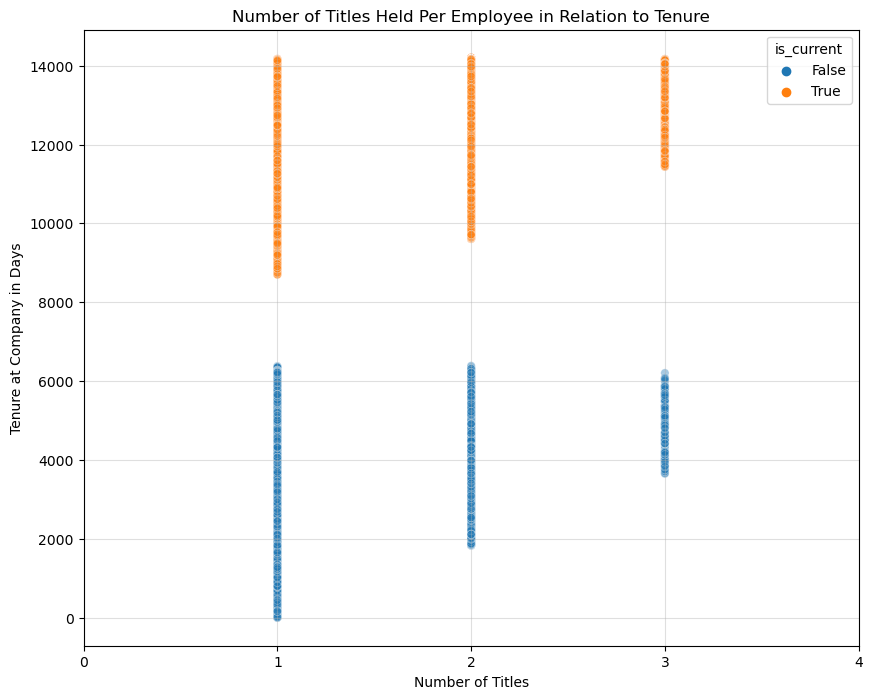

In [373]:
# plot the tenure days (x) against count of titles (y)
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x=df.n_titles,y=df.tenure_days,hue=df.is_current,alpha=0.4)
plt.title('Number of Titles Held Per Employee in Relation to Tenure')
plt.xlabel('Number of Titles')
plt.ylabel('Tenure at Company in Days')

plt.grid(alpha = 0.4)
plt.xticks([0,1,2,3,4])

plt.show()

In [382]:
# Run the correlations test and draw conclusions
t,p = stats.pearsonr(df.n_titles,df.tenure_days)

if p < alpha:
    print('reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('We conclude that there is a linear relationship between tenure of an employee and their number of titles')
else:
    print('fail to reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('We conclude that is is not a linear relationship between tenure of an employee and their number of titles')

reject the null hypothesis
t = 0.3456718486883894
p = 0.0
We conclude that there is a linear relationship between tenure of an employee and their number of titles


4. Use the `sleepstudy` data.

In [397]:
sleepstudy = data('sleepstudy')
data('sleepstudy',show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

- Is there a relationship between days and reaction time?

$H_0$: There is no linear relationship between days and reaction time.

$H_a$: There is a linear relationship between days and reaction time.

In [395]:
# Check data and format it accordingly
sleepstudy.dtypes

Reaction    float64
Days          int64
Subject       int64
dtype: object

In [405]:
# let's format subject to be string
sleepstudy.Subject = sleepstudy.Subject.astype(str)
sleepstudy.dtypes

Reaction    float64
Days          int64
Subject      object
dtype: object

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

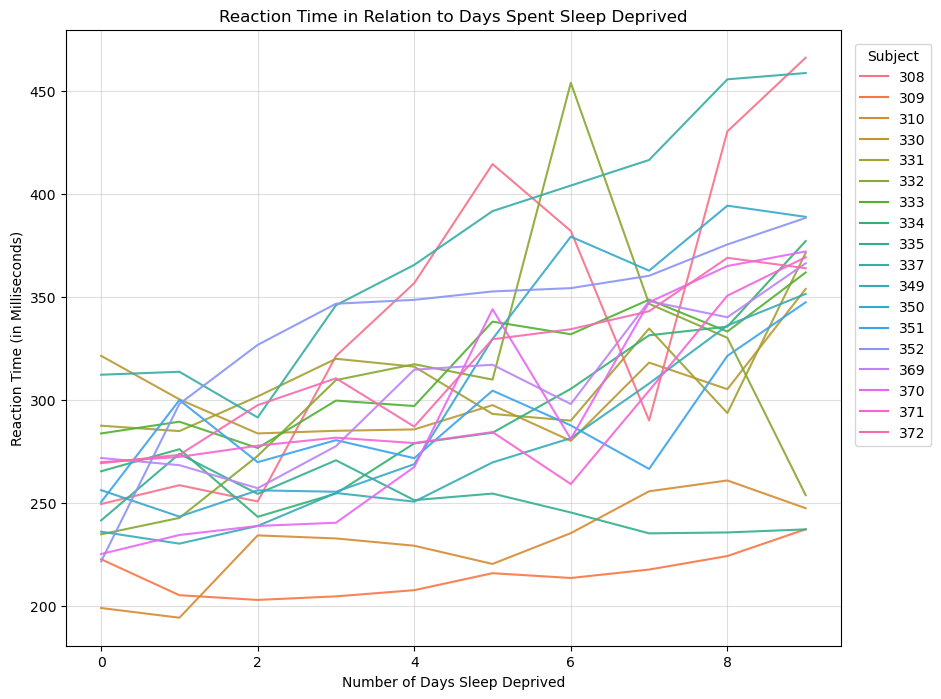

In [445]:
# Plot reaction time against days
plt.figure(figsize=(10,8))
sns.lineplot(data=sleepstudy,y='Reaction',x='Days',hue='Subject',alpha=0.9)

plt.title('Reaction Time in Relation to Days Spent Sleep Deprived')
plt.ylabel('Reaction Time (in Milliseconds)')
plt.xlabel('Number of Days Sleep Deprived')

plt.grid(alpha=0.4)
plt.legend(bbox_to_anchor=(1,1), borderaxespad=1,title='Subject')

plt.show()

In [449]:
# Run correlations test and draw conclusions
t,p = stats.pearsonr(sleepstudy.Days,sleepstudy.Reaction)

if p < alpha:
    print('reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('There is a linear correlation between reaction time and number of days without sleep')
else:
    print('fail to reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('There is no linear correlation between reaction time and number of days without sleep')

reject the null hypothesis
t = 0.5352302262650255
p = 9.894096322214486e-15
There is a linear correlation between reaction time and number of days without sleep


---------

## Comparison of Means

1. Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?

We are looking at a subgroup comparison to a population and looking both directions, so it is **1-sample, 2-tailed T-Test**.

- Are adults who drink milk taller than adults who don't drink milk?

We are comparing two subgroups and looking in 1 direction, so it is a **2-Sample, 1-Tail T-Test**.

- Is the price of gas higher in Texas or in New Mexico?

We are comparing two subgroups and looking in ~2 directions~ 1 direction (*see gas **higher***), so it is a **2-Sample, ~2-Tail~ 1-Tail T-Test**.

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

We are comparing multiple subgroups, so it is an **ANOVA T-Test**.

2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

- $H_0$: There is no difference in average time it takes to sell homes between the two offices.
- $H_a$: There is a difference in the average time it takes to sell homes between the two offices.

In [64]:
df = pd.DataFrame(
{
    'n_sales':[40,50],
    'office_mean':[90,100],
    'office_std':[15,20]
},index=['Office1','Office2']
)
df

,n_sales,office_mean,office_std
Office1,40,90,15
Office2,50,100,20


In [62]:
alpha = 0.05
t,p = stats.ttest_ind_from_stats(df.office_mean['Office1'],
                           df.office_std['Office1'],
                           df.n_sales['Office1'],
                           df.office_mean['Office2'],
                           df.office_std['Office2'],
                           df.n_sales['Office2'])

print(f't = {t}')
print(f'p = {p}')

t = -2.6252287036468456
p = 0.01020985244923939


In [67]:
if p < alpha:
    print('We reject the null hypothesis')
    print('There is a difference in sale time between the two offices.')
    if t < 0:
        print('Office 1 takes less time to sell homes.')
    else:
        print('Office 2 takes less time to sell homes.')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis
There is a difference in sale time between the two offices.
Office 1 takes less time to sell homes.


3. Load the `mpg` dataset and use it to answer the following questions:

In [95]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- $H_0$: There is no difference in fuel-efficiency between cars from 2008 vs cars from 1999.
- $H_a$: There is a difference in fuel-efficiency between cars from 2008 vs cars from 1999.

For clarification, fuel-efficiency will be calculated by the **average mpg of city and highway**.

In [103]:
# Add on the averages per vehicle
mpg['avg_mpg'] = mpg[['cty','hwy']].mean(axis=1)

In [153]:
# Separate into 2 series: 2008 vs 1999
# mpg.year.value_counts()  # verify counts
mpg_1999 = mpg[mpg.year == 1999].avg_mpg
mpg_2008 = mpg[mpg.year == 2008].avg_mpg


In [160]:
# Run equal variance check
# H0: There is no difference in variance.
# Ha: There is a difference in variance

t,p = stats.levene(mpg_1999,mpg_2008)
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    print('There is no difference in variance.')

We fail to reject the null hypothesis
There is no difference in variance.


In [186]:
# Use the appropriate test
t,p = stats.ttest_ind(mpg_2008,mpg_1999)

if p < alpha:
    print('We reject the null hypothesis')
    print('There is a difference in average mpg between 1999 and 2008 vehicles.')
    print(f't = {t}')
    print(f'p = {p}')
else:
    print('We fail to reject the null hypothesis')
    print('There is no difference in average mpg between 1999 and 2008 vehicles.')
    print(f't = {t}')
    print(f'p = {p}')

We fail to reject the null hypothesis
There is no difference in average mpg between 1999 and 2008 vehicles.
t = -0.21960177245940962
p = 0.8263744040323578


- Are compact cars more fuel-efficient than the average car?

In [205]:
# Revisit dataset, this time looking at classes
# Get how many classes there are to determine "average car"
compact = mpg[mpg['class'] == 'compact'].avg_mpg
compact.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: avg_mpg, dtype: float64

In [183]:
# Make hypotheses

- $H_0$: Compact cars are more fuel efficient than the average car.
- $H_a$: Compact cars are equal to or less than the fuel efficiency of the average car.

In [215]:
# Determine test to use
# Determine distribution of data using shapiro test
t,p = stats.shapiro(compact)
print('''
Shapiro Test:
H_0: The data is a normal distribution.
H_a: The data is not a normal distribution.
''')
if p < alpha:
    print('We reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('The data is not distributed normally.')
else:
    print('We fail to reject the null hypothesis.')
    print(f't = {t}')
    print(f'p = {p}')
    print('The data is distributed normally.')


Shapiro Test:
H_0: The data is a normal distribution.
H_a: The data is not a normal distribution.

We reject the null hypothesis
t = 0.8514808416366577
p = 2.8258320526219904e-05
The data is not distributed normally.


In [248]:
# test if mean of sample is greater than mean of population
compact.mean() > mpg.avg_mpg.mean()

True

In [250]:
# Run official test
t,p = stats.ttest_1samp(compact,mpg.avg_mpg.mean())

if p < alpha:
    print('We reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('We conclude that compact cars are either equal to or less than the efficiency of the average car.')
else:
    print('We fail to reject the null hypothesis.')
    print(f't = {t}')
    print(f'p = {p}')
    print('We conclude that compact cars are greater than the efficiency of the average car.')

We reject the null hypothesis
t = 7.896888573132533
p = 4.1985637943171486e-10
We conclude that compact cars are either equal to or less than the efficiency of the average car.


*It would appear that I gave myself a type I error (false positive). Let's reevaluate.*

- $H_0$: Compact cars are either equal to or less fuel efficient than the average car.
- $H_a$: Compact cars are more fuel efficient than the average car.

In [253]:
t,p = stats.ttest_1samp(compact,mpg.avg_mpg.mean())

if p < alpha:
    print('We reject the null hypothesis')
    print(f't = {t}')
    print(f'p = {p}')
    print('We conclude that compact cars are more fuel efficient than the average car.')
else:
    print('We fail to reject the null hypothesis.')
    print(f't = {t}')
    print(f'p = {p}')
    print('We conclude that compact cars are equal to or less fuel efficient than the average car.')

We reject the null hypothesis
t = 7.896888573132533
p = 4.1985637943171486e-10
We conclude that compact cars are more fuel efficient than the average car.


- Do manual cars get better gas mileage than automatic cars?

In [269]:
# Make new column denoting automatic vs manual
mpg['trans_type'] = np.where(mpg.trans.str.startswith('a'),'auto','manual')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg,trans_type
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [279]:
# Create Series of automatic and manual cars
auto = mpg[mpg.trans_type == 'auto'].avg_mpg
# auto.head()
manual = mpg[mpg.trans_type == 'manual'].avg_mpg
# manual.head()

In [284]:
# Make hypotheses:

- $H_0$: Manual cars get equal to or worse gas mileage than automatic cars.
- $H_a$: Manual cars get better gas mileage than automatic cars.

In [288]:
# Make a basic test of the hypothesis
manual.mean() > auto.mean()

True

In [290]:
# Test the hypothesis
stats.ttest_ind(auto,manual,alternative='greater')

if p < alpha:
    print('We reject the null hypothesis.')
    print(f't = {t}')
    print(f'p = {p}')
    print('Manual cars get better gas mileage than automatic cars.')
else:
    print('We fail to reject the null hypothesis.')
    print(f't = {t}')
    print(f'p = {p}')
    print('Manual cars get equal to or worse gas mileage than automatic cars.')

We reject the null hypothesis.
t = 7.896888573132533
p = 4.1985637943171486e-10
Manual cars get better gas mileage than automatic cars.
